In [1]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from typing import Set

print(f"matplotlib version: {matplotlib.__version__}")
print(f"geopandas version:  {gpd.__version__}")

plt.rcParams["figure.figsize"] = (20, 10)

matplotlib version: 3.2.2
geopandas version:  0.13.2


Here we create two sets (using geographies!). One contains the G7 countries, and the other contains EU countries. 

A set is a collection of unordered elements. Each element must be distinct and immutable.

In [2]:
g7 = { 
    "Canada", 
    "France", 
    "Germany", 
    "Italy", 
    "Japan", 
    "U.K. of Great Britain and Northern Ireland", 
    "United States of America"
}

eu = {
    "Austria", 
    "Belgium", 
    "Bulgaria", 
    "Croatia", 
    "Cyprus", 
    "Czech Republic", 
    "Denmark", 
    "Estonia", 
    "Finland", 
    "France", 
    "Germany", 
    "Greece", 
    "Hungary", 
    "Ireland", 
    "Italy", 
    "Latvia", 
    "Lithuania", 
    "Luxembourg", 
    "Malta", 
    "Netherlands", 
    "Poland", 
    "Portugal", 
    "Romania", 
    "Slovakia", 
    "Slovenia", 
    "Spain", 
    "Sweden"
}

print(f"Set: g7 \nitems in set: {len(g7)}\n\n")
print(f"Set: eu \nitems in set: {len(eu)}")

Set: g7 
items in set: 7


Set: eu 
items in set: 27


We can then perform operations on these sets. Consider the G7 set to be A, and the EU set to be B. The most useful set operations are: 

![Set operations. source: Datacamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526998740/15_union_intersection_difference_symmetric.png)

Union - returns all values in A and B:

In [3]:
g7.union(eu)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

Intersection - returns the values that both A and B share:

In [4]:
g7.intersection(eu)

{'France', 'Germany', 'Italy'}

Difference - returns values in A that are not shared with B:

In [5]:
g7.difference(eu)

{'Canada',
 'Japan',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

When finding the difference between sets, order matters. Notice how switching the positition of the sets in the operation gives us values in B that are not present in A:

In [6]:
eu.difference(g7)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Ireland',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden'}

Symmetric difference - returns values that are unique to A and B, not found in both:

In [7]:
g7.symmetric_difference(eu)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Ireland',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

Set operations are sometimes best visualised when working with polygons. Thankfully, geography lends itself nicely to this!

[Here's](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?location=3,41.53161,21.19922&basemap=jawg.light) a dataframe of world adminstrative boundaries. 

We're going to load in the names, continents and geometries from the shapefile using geopandas and ensure the EPSG is applicable. 

In [1]:
df = gpd.read_file("./world-administrative-boundaries/world-administrative-boundaries.shp")[["name", "continent", "geometry"]]

df = df.to_crs(epsg=4326)
df

,name,continent,geometry
0,Ma'tan al-Sarra,Africa,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,Switzerland,Europe,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,Jersey,Europe,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,Austria,Europe,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,Portugal,Europe,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."
...,...,...,...
251,Albania,Europe,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."
252,Gibraltar,Europe,"POLYGON ((-5.35580 36.16331, -5.33451 36.16256..."
253,New Zealand,Oceania,"MULTIPOLYGON (((169.18552 -52.57695, 169.16166..."
254,Madeira Islands,Europe,"POLYGON ((-17.10250 32.82333, -17.05306 32.809..."


Then define a function to help us plot the continents in our previously defined sets:

In [ ]:
def plot_set(inp_df: gpd.GeoDataFrame, inp_set: Set[str], title: str) -> None:
    inp_df[inp_df["name"].isin(inp_set)].plot(column="continent")
    plt.title(title)

Plot the G7 set:

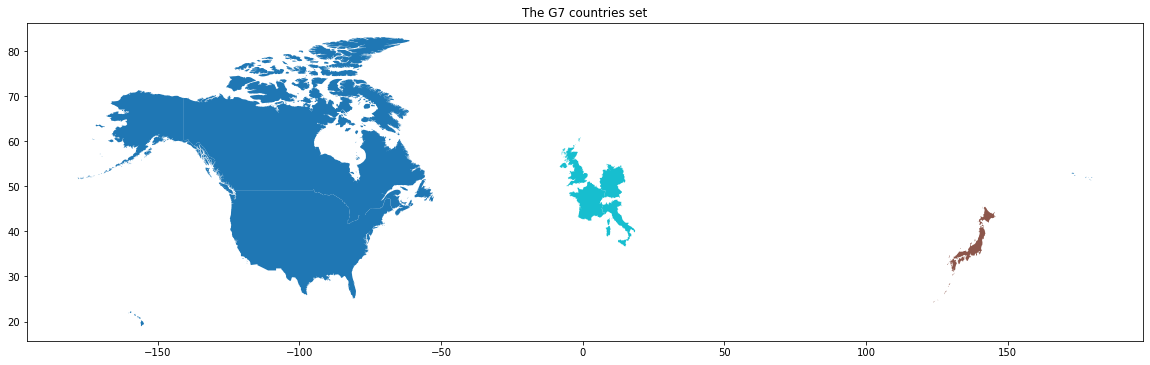

In [9]:
plot_set(df, g7, "The G7 countries set")

And plot the EU set.

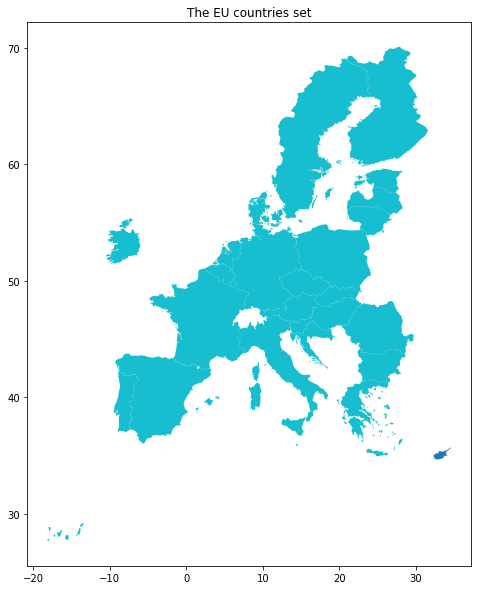

In [10]:
plot_set(df, eu, "The EU countries set")

Let's take a look at the spatial representation of a union. All countries in both sets are present.

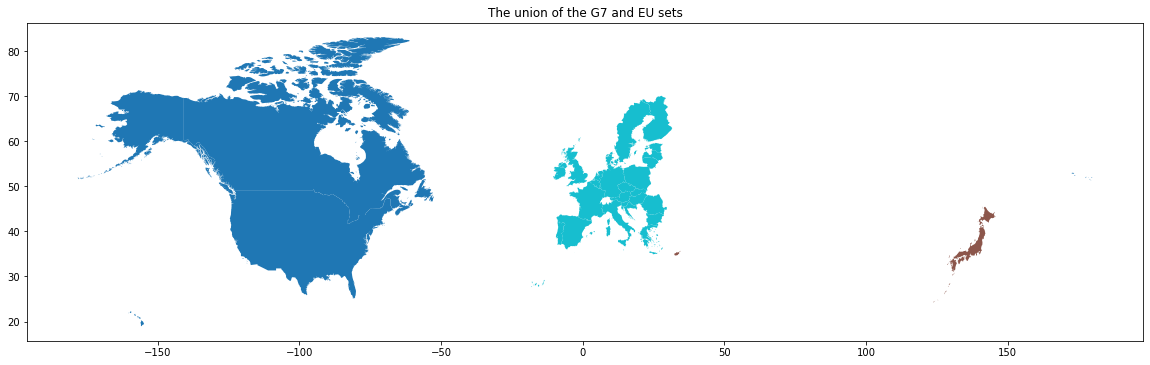

In [11]:
plot_set(df, g7.union(eu), "The union of the G7 and EU sets")

And now the intersection: members of both G7 and the EU are present.

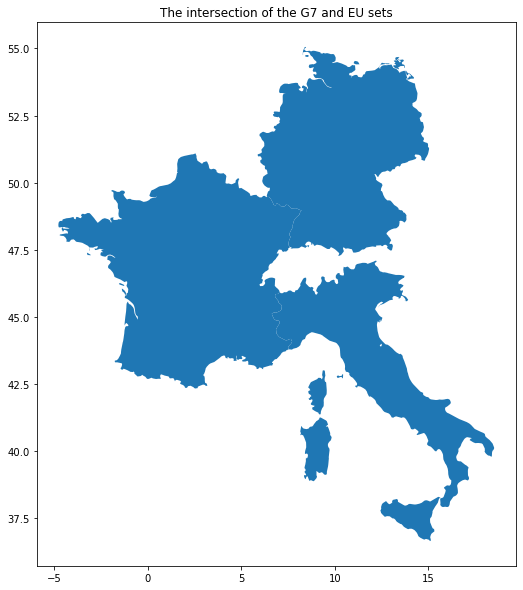

In [12]:
plot_set(df, g7.intersection(eu), "The intersection of the G7 and EU sets")

In the difference between G7 and EU (with G7 as A), those exclusively in G7 are seen.

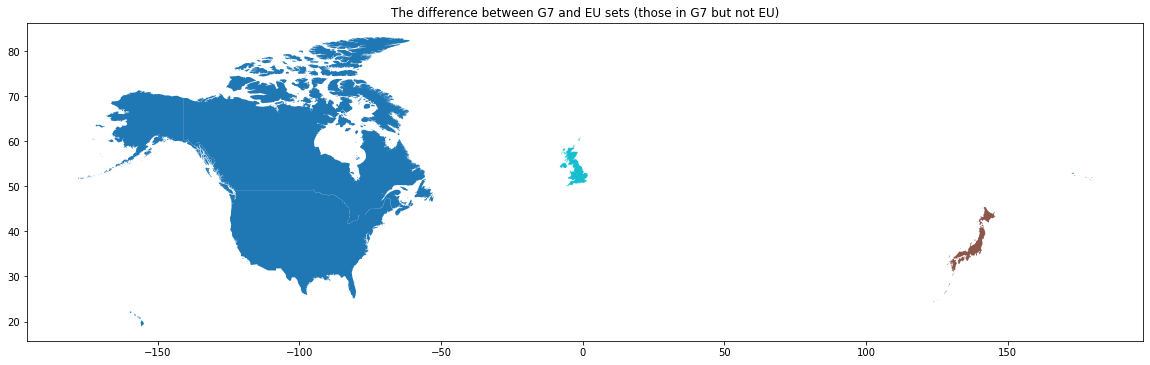

In [13]:
plot_set(df, g7.difference(eu), "The difference between G7 and EU sets (those in G7 but not EU)")

In the difference between G7 and EU (with EU as A), those exclusively in the EU are seen.

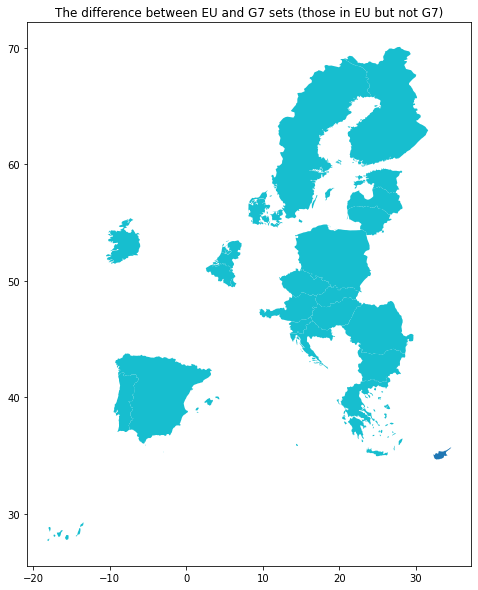

In [14]:
plot_set(df, eu.difference(g7), "The difference between EU and G7 sets (those in EU but not G7)")

And in the symmetric difference, only countries belonging to one or the other (but not both) are seen. 

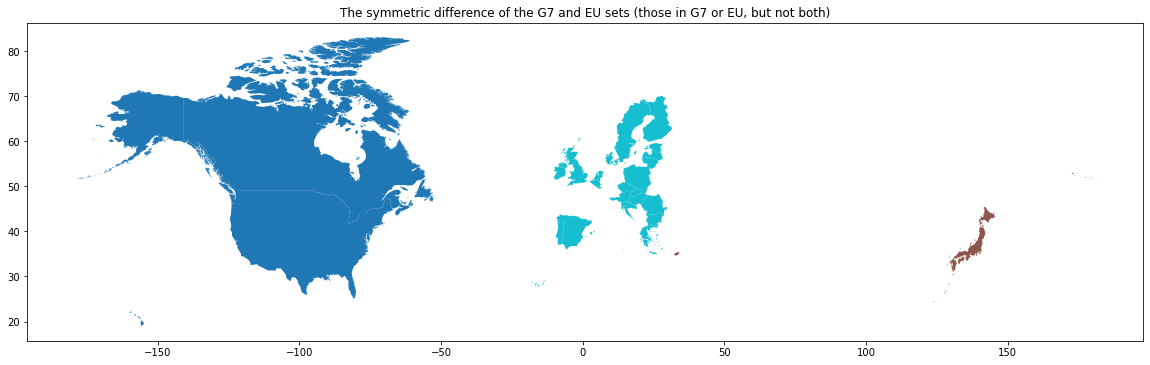

In [15]:
plot_set(df, eu.symmetric_difference(g7), "The symmetric difference of the G7 and EU sets (those in G7 or EU, but not both)")

If we create overlapping polygons, we can visualise these set operations further. Appling a convex hull transformation to the EU countries will create overlapping polygons for this set.

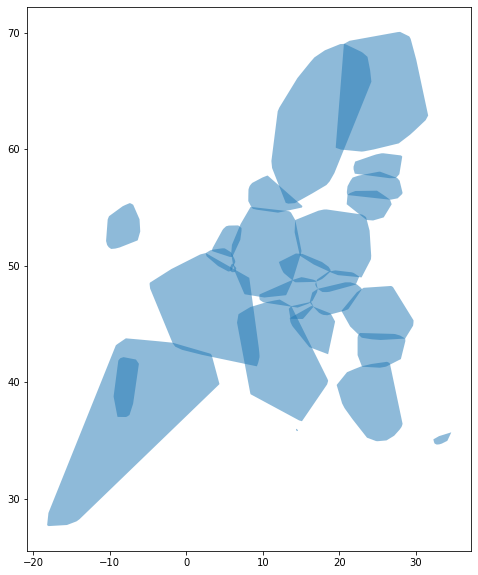

In [16]:
convex_hull_eu = df[df["name"].isin(eu)].copy()

convex_hull_eu["geometry"] = convex_hull_eu[convex_hull_eu["name"].isin(eu)].convex_hull 
convex_hull_eu.plot(alpha=0.5)

Using intersection, we can now select the countries that are in both the EU and G7 and plot their convex hull representations individually.

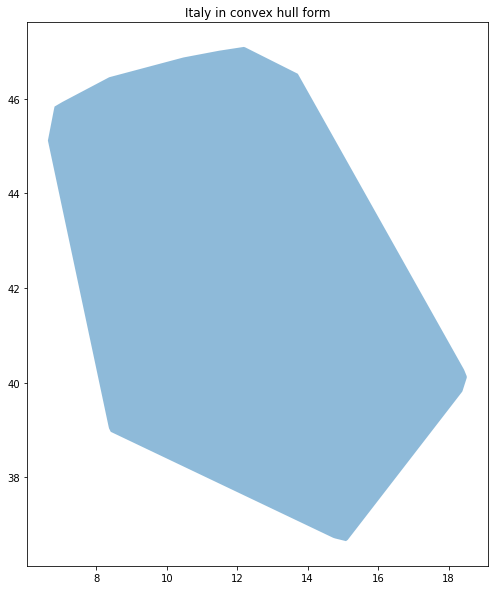

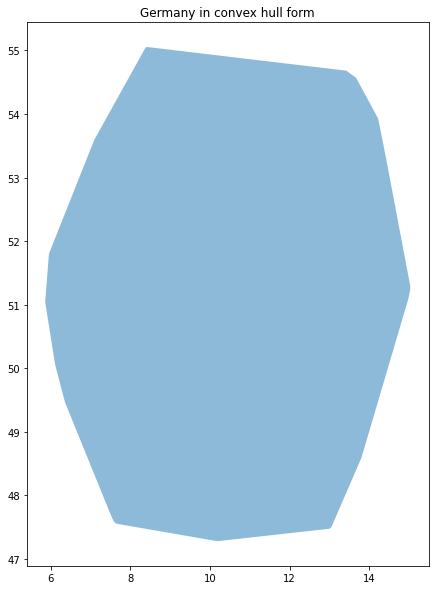

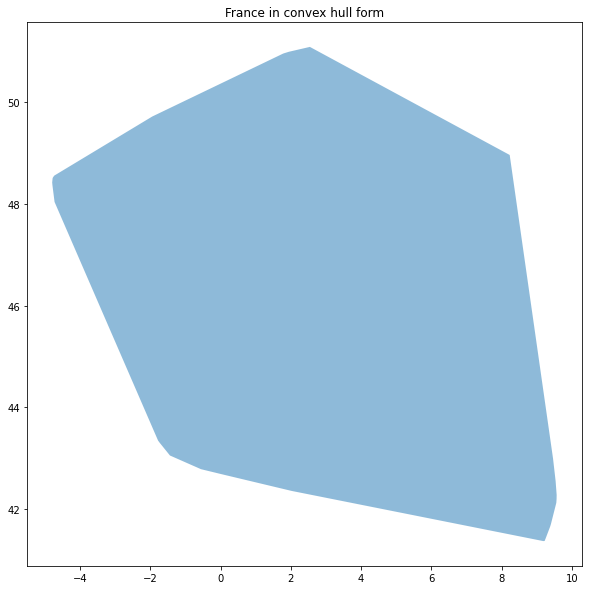

In [17]:
convex_hull_g7_eu = {}

for country in g7.intersection(eu):
    convex_hull_g7_eu[country] = convex_hull_eu[convex_hull_eu["name"] == country]

for country in convex_hull_g7_eu:
    convex_hull_g7_eu[country].plot(alpha=0.5)
    plt.title(f"{country} in convex hull form")
    plt.show()

Using union, let's overlay the polygons representing France and Germany.

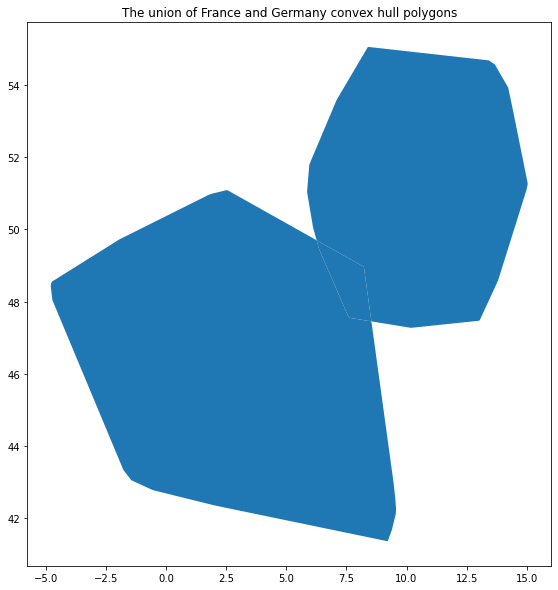

In [35]:
gpd.overlay(convex_hull_g7_eu["France"], convex_hull_g7_eu["Germany"], how="union").plot()
plt.title("The union of France and Germany convex hull polygons");

Since this is a union, the full geometries of both are kept. If we overlay France and Germany as an intersection, we only return the space that both their geometries share.  

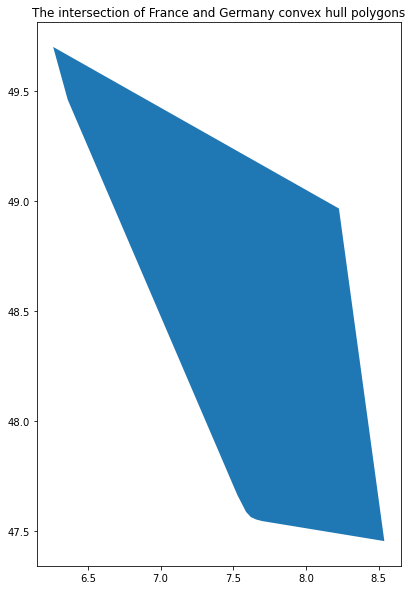

In [36]:
gpd.overlay(convex_hull_g7_eu["France"], convex_hull_g7_eu["Germany"], how="intersection").plot()
plt.title("The intersection of France and Germany convex hull polygons");

If we overlay using a difference (with France as A), we return the geometry that is exclusively France. Any geometry it shares with Germany is lost. 

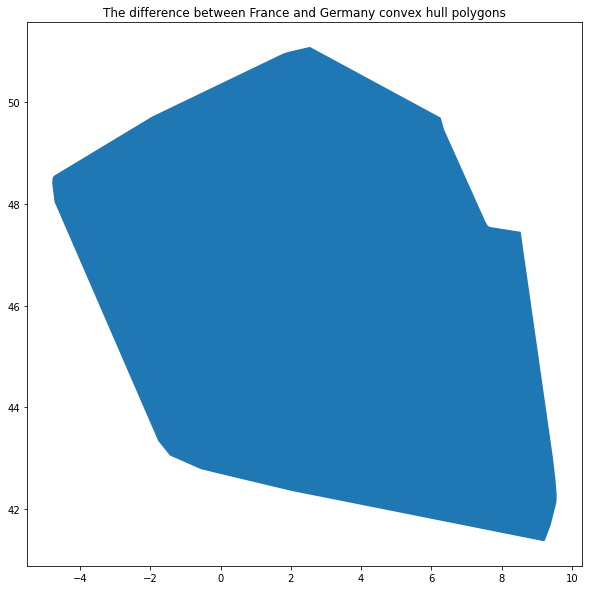

In [37]:
gpd.overlay(convex_hull_g7_eu["France"], convex_hull_g7_eu["Germany"], how="difference").plot()
plt.title("The difference between France and Germany convex hull polygons");

And vice versa! Here's an overlay using difference with Germany as A.

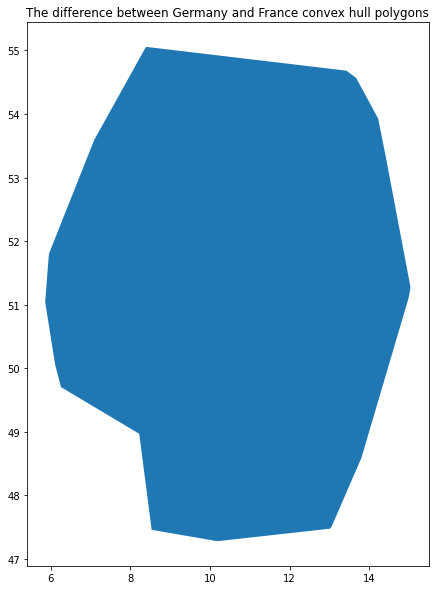

In [38]:
gpd.overlay(convex_hull_g7_eu["Germany"], convex_hull_g7_eu["France"], how="difference").plot()
plt.title("The difference between Germany and France convex hull polygons");

Finally, a last look at the symmetric difference. The geometries that France and Germany share are lost.  

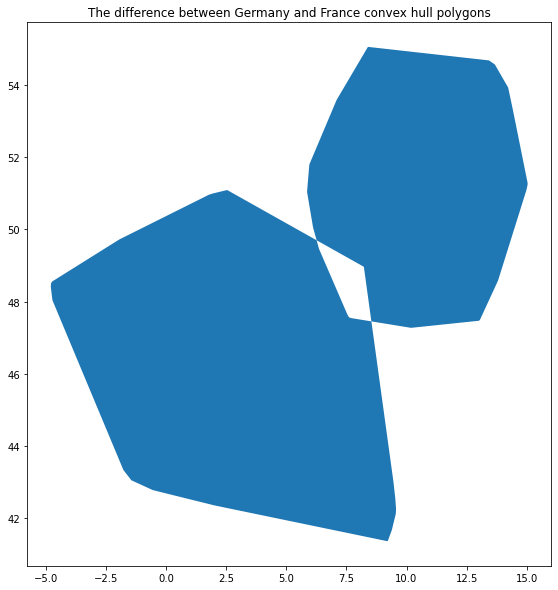

In [40]:
gpd.overlay(convex_hull_g7_eu["Germany"], convex_hull_g7_eu["France"], how="symmetric_difference").plot()
plt.title("The symmetric difference between Germany and France convex hull polygons");

Set operations are very useful in spatial and geographic analysis. Being confident in the different types will save both time and googling!